In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 

In [4]:
#DecisionTreeClassifier?

In [5]:
#RandomForestClassifier?

In [6]:
df=pd.read_csv("heart_csv.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


#data cleaning and preprocessing 

In [7]:
df.rename(columns
={0:'Age',1:'Sex',2:'Chest_pain',3:'Resting_blood_pressure',4:'Cholesterol',5:'Fasting_blood_sugar',6:'ECG_results',7:'Maximum_heart_rate',8:'Exercise_induced_angina',9:'ST_depression',10:'ST_slope',11:'Major_vessels',
12:'Thalassemia_types',13:'Heart_attack'}, inplace = True)

In [8]:
df

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [9]:
df['Thalassemia_types'] =df['Thalassemia_types'].replace("?",np.nan)
df['Major_vessels']=df['Major_vessels'].replace("?",np.nan)
df.isna().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              4
Thalassemia_types          2
Heart_attack               0
dtype: int64

In [10]:
df['Major_vessels']=df['Major_vessels'].replace(np.nan,"100")
df['Major_vessels'] = df['Major_vessels'].astype(int)
df['Major_vessel'] = df.loc[df['Major_vessels'] != 100]['Major_vessels']
mean=np.nanmean(df['Major_vessel'])
df['Major_vessels'] = df['Major_vessels'].replace(100,mean)
df['Thalassemia_types'] =df['Thalassemia_types'].replace(np.nan,"100")
df['Thalassemia_types'] = df['Thalassemia_types'].astype(int)
df['Thalassemia_type'] =df.loc[df['Thalassemia_types'] != 100]['Thalassemia_types']
mean=np.nanmean(df['Thalassemia_type'])
df['Thalassemia_types'] =df['Thalassemia_types'].replace(100,mean)
df.drop(['Thalassemia_type','Major_vessel'],axis=1,inplace=True)

In [11]:
df.isna().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

In [12]:
df.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels              float64
Thalassemia_types          float64
Heart_attack                 int64
dtype: object

In [13]:
df['Heart_attack'].replace({2:"1",3:"1",4:"1"},inplace = True)
df[['Heart_attack']] = df[['Heart_attack']].astype(int)

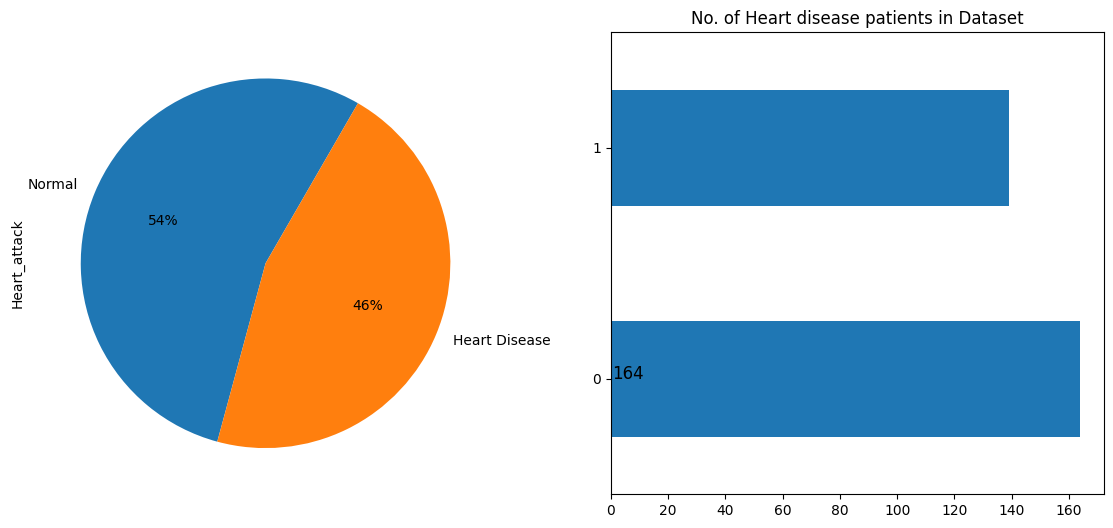

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))
ax1 = df['Heart_attack'].value_counts().plot.pie( x="Heart disease" ,y ='no.ofpatients',autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle =60,ax=ax1);
ax2 = df["Heart_attack"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["Heart_attack"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
    ax2.set(title = 'No. of Heart disease patients in Dataset')
    plt.show()

In [15]:
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
df.tail()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0.672241,3.0,0


In [17]:
df.shape

(303, 14)

In [18]:
df.notna().sum()

Age                        303
Sex                        303
Chest_pain                 303
Resting_blood_pressure     303
Cholesterol                303
Fasting_blood_sugar        303
ECG_results                303
Maximum_heart_rate         303
Exercise_induced_angina    303
ST_depression              303
ST_slope                   303
Major_vessels              303
Thalassemia_types          303
Heart_attack               303
dtype: int64

In [19]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    float64
 12  Thalassemia_types        303 non-null    float64
 13  Heart_attack             303 non-null    int32  
dtypes: float64(3), int32(1), i

Model selection and training

In [21]:
df1=df.drop(['Heart_attack'],axis=1)
X= df1
Y = df.Heart_attack


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42)
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [23]:
#fitting LR to training set
classifier =LogisticRegression()
classifier.fit(X_train,y_train)
#Predict the test set results
y_Class_pred=classifier.predict(X_test)
y_pred_new_threshold = (classifier.predict_proba(X_test)[:,1]>=0.9).astype(int)
cm1 =confusion_matrix(y_test, y_pred_new_threshold)
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print(cm1)
#checking the accuracy for predicted results
lr_acc = accuracy_score(y_test, y_Class_pred)*100
lr_f1 = f1_score(y_test, y_Class_pred)*100
lr_pre = precision_score(y_test, y_Class_pred)*100
lr_sens = sensitivity*100
lr_spec = specificity*100
print("Accuracy:",lr_acc)#y 83
print('F1 score:', lr_f1)#90 =8
print("Precision:",lr_pre)#90 =7
print('Sensitivity:',lr_sens)#91 y
print('Specificity:',lr_spec)#25 
print('classification_error:',100-accuracy_score(y_test, y_Class_pred)*100)#y 17

[[28  1]
 [19 13]]
Accuracy: 88.52459016393442
F1 score: 89.23076923076923
Precision: 87.87878787878788
Sensitivity: 96.55172413793103
Specificity: 40.625
classification_error: 11.47540983606558


In [24]:
classifiergb = GaussianNB()
classifiergb.fit(X_train, y_train)
##Predict the test set results
y_pred =classifiergb.predict(X_test)
y_pred_new_threshold =(classifiergb.predict_proba(X_test)[:,1]>=0.9).astype(int)
cm1 = confusion_matrix(y_test, y_pred_new_threshold)
#cm1 = confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
#checking the accuracy for predicted results
nb_acc = accuracy_score(y_test, y_pred)*100
nb_f1 = f1_score(y_test, y_pred)*100
nb_pre = precision_score(y_test, y_Class_pred)*100
nb_sens = sensitivity*100
nb_spec = specificity*100
print("Accuracy:",nb_acc)# 76 2   y
print("Precision:",nb_pre)#90.5 7  yk
print('F1 score:', nb_f1)#84.5 11
print('Sensitivity:',nb_sens)#79 12
print('Specificity:',nb_spec)#60 1  y
print('classification_error:',100-accuracy_score(y_test, y_pred)*100)#24 3 y
cm1

Accuracy: 83.60655737704919
Precision: 87.87878787878788
F1 score: 83.33333333333334
Sensitivity: 93.10344827586206
Specificity: 75.0
classification_error: 16.393442622950815


array([[27,  2],
       [ 8, 24]], dtype=int64)

[[26  3]
 [ 8 24]]
Accuracy: 81.9672131147541
Precision: 88.88888888888889
F1 score: 81.35593220338983
Sensitivity: 89.65517241379311
Specificity: 75.0
classification_error: 18.032786885245898




[Text(0.49609375, 0.9444444444444444, 'Chest_pain <= 0.414\nentropy = 0.99\nsamples = 242\nvalue = [135, 107]'),
 Text(0.1953125, 0.8333333333333334, 'Age <= 0.186\nentropy = 0.767\nsamples = 134\nvalue = [104, 30]'),
 Text(0.0625, 0.7222222222222222, 'Cholesterol <= -0.366\nentropy = 0.473\nsamples = 79\nvalue = [71, 8]'),
 Text(0.041666666666666664, 0.6111111111111112, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.08333333333333333, 0.6111111111111112, 'Cholesterol <= -0.293\nentropy = 0.702\nsamples = 42\nvalue = [34, 8]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10416666666666667, 0.5, 'Thalassemia_types <= -0.098\nentropy = 0.552\nsamples = 39\nvalue = [34, 5]'),
 Text(0.0625, 0.3888888888888889, 'Resting_blood_pressure <= -1.282\nentropy = 0.216\nsamples = 29\nvalue = [28, 1]'),
 Text(0.041666666666666664, 0.2777777777777778, 'Age <= -0.474\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.020833333333333332, 0.16666666666666666, 

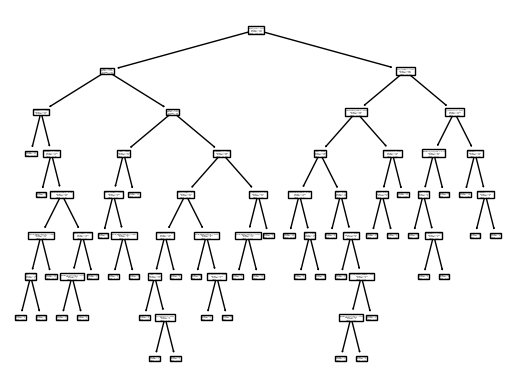

In [25]:
# Fitting Decision Tree Classification to the Training set
classifierdt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifierdt.fit(X_train, y_train)
# dot_data=tree.export_graphviz(classifierdt,out_file=None,
#
feature_cols=['Age','Sex','Chest_pain','Resting_blood_pressure','Cholesterol','Fasting_blood_sugar','ECG_results','Maximum_heart_rate','Exercise_induced_angina','ST_depression','ST_slope','Major_vessels','Thalassemia_types']
# Predicting the Test set results
y_pred_dt = classifierdt.predict(X_test)
y_pred_new = (classifierdt.predict_proba(X_test)[:,1]>=1).astype(int)
cm1 = confusion_matrix(y_test, y_pred_new)
#cm1 = confusion_matrix(y_test, y_pred)
#print(cm)
print(cm1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
dt_acc = accuracy_score(y_test, y_pred_dt)*100
dt_f1 = f1_score(y_test, y_pred_dt)*100
dt_pre = precision_score(y_test, y_pred_dt)*100
dt_sens = sensitivity1*100
dt_spec = specificity1*100
print("Accuracy:",dt_acc) #85 2 y
print("Precision:",dt_pre)#86  5 y
print('F1 score:', dt_f1)#91.8 10 
print('Sensitivity:',dt_sens)#98.8
print('Specificity:',dt_spec)#0
print('classification_error:',100-accuracy_score(y_test, y_pred_dt)*100)#15 3 y
print()
print()
from sklearn import tree
tree.plot_tree(classifierdt,feature_names=feature_cols)

In [26]:
classifierrf =RandomForestClassifier(criterion ='entropy',n_estimators=60,random_state=0)
classifierrf.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf = classifierrf.predict(X_test)
y_pred_new = (classifierrf.predict_proba(X_test)[:,1]>=0.95).astype(int)
cm1 = confusion_matrix(y_test, y_pred_new)
print(cm1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
rf_acc = accuracy_score(y_test, y_pred_rf)*100
rf_f1 = (f1_score(y_test, y_pred_rf))*100
rf_pre = precision_score(y_test, y_pred_rf)*100
rf_sens = sensitivity1*100
rf_spec = specificity1*100
print("Accuracy:",rf_acc)#y
print("Precision:",rf_pre)#y
print('F1 score:', rf_f1)#92 -83 =9
print('Sensitivity:',rf_sens)#98 -85 =13
print('Specificity:',rf_spec)#y
print('classification_error:',100-accuracy_score(y_test, y_pred_rf)*100)#y


[[29  0]
 [24  8]]
Accuracy: 90.1639344262295
Precision: 93.33333333333333
F1 score: 90.32258064516128
Sensitivity: 100.0
Specificity: 25.0
classification_error: 9.836065573770497


In [27]:
from time import time
import sklearn.ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [28]:

# Create the sub-model
HRFLM_estimators = []
# Defining 1 Logistic Regression Model
model11 = LogisticRegression(random_state = 0)
HRFLM_estimators.append(('logistic1', model11))
# Defining 3 Random Forest Models
model21 = RandomForestClassifier(random_state = 942)
HRFLM_estimators.append(('RF1', model21))
model22 =RandomForestClassifier(random_state = 0)
HRFLM_estimators.append(('RF2', model22))
model23 = RandomForestClassifier(random_state = 15)
HRFLM_estimators.append(('RF3', model23))
# Defining the HRFLM ensemble model
HRFLM_ensemble =VotingClassifier(HRFLM_estimators,voting='soft')
#Training the model
HRFLM_ensemble.fit(X_train, y_train)
#Testing the model
HRFLM_Prediction = HRFLM_ensemble.predict(X_test)
## Accuracy Score
HRFLM_pred_proba = HRFLM_ensemble.predict_proba(X_test)[:,1]
HRFLM_Accuracy = roc_auc_score(y_test, HRFLM_pred_proba)*100
print("Accuracy:",HRFLM_Accuracy)
## Precision
HRFLM_Precision = precision_score(y_test, HRFLM_Prediction)
print("The precision score for HRFLM is: "+"{:.2f}".format(HRFLM_Precision))
## Recall Feature
HRFLM_Recall = recall_score(y_test, HRFLM_Prediction)
print("The recall score for HRFLM is as follows:"+"{:.2f}".format(HRFLM_Recall))
## F1 Score
HRFLM_F1Score = f1_score(y_test, HRFLM_Prediction)
print("The F1 Score for HRFLM is: "+"{:.2f}".format(HRFLM_F1Score))
## Confusion Matrix
print('classification_error:',100-accuracy_score(y_test, y_pred_dt)*100)
HRFLM_Confusion_Matrix=confusion_matrix(y_test,HRFLM_Prediction)
print("Confusion_Matrix: \n\n",HRFLM_Confusion_Matrix, "\n" )
cm1=HRFLM_Confusion_Matrix
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
dt_sens = sensitivity1*100
dt_spec = specificity1*100
print('Sensitivity:',dt_sens)
print('Specificity:',dt_spec)
## Classification Report
target_names =['class 0', 'class 1']
print()
print(classification_report(y_test,HRFLM_Prediction,zero_division=1,target_names=target_names))

#acu y
#pre y
# f1 7
#clas y

Accuracy: 93.85775862068965
The precision score for HRFLM is: 0.90
The recall score for HRFLM is as follows:0.84
The F1 Score for HRFLM is: 0.87
classification_error: 18.032786885245898
Confusion_Matrix: 

 [[26  3]
 [ 5 27]] 

Sensitivity: 89.65517241379311
Specificity: 84.375

              precision    recall  f1-score   support

     class 0       0.84      0.90      0.87        29
     class 1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [29]:
#VotingClassifier?
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [30]:
from sklearn.neural_network import MLPClassifier
classifierdl =MLPClassifier(hidden_layer_sizes=(8,8,8),activation='logistic',solver='adam',max_iter=500,random_state=101)
classifierdl.fit(X_train, y_train)
# Predicting the Test set results
y_pred_dl = classifierdl.predict(X_test)
y_pred_new_threshold = (classifierdl.predict_proba(X_test)[:,1]>=0.8).astype(int)
cm1 =confusion_matrix(y_test, y_pred_new_threshold)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
dl_acc =accuracy_score(y_test, y_pred_dl)*100
dl_f1 = f1_score(y_test, y_pred_dl)*100
dl_pre = precision_score(y_test, y_pred_dl)*100
dl_sens = sensitivity1*100
dl_spec = specificity1*10
print("Accuracy:",dl_acc)
print("Precision:",dl_pre)
print('F1 score:', dl_f1)
print('Sensitivity:',dl_sens)
print('Specificity:',dl_spec)
print('classification_error:',100-accuracy_score(y_test, y_pred_dl)*100)

Accuracy: 88.52459016393442
Precision: 90.32258064516128
F1 score: 88.88888888888889
Sensitivity: 96.55172413793103
Specificity: 6.5625
classification_error: 11.47540983606558


In [31]:
from sklearn.svm import SVC
classifiersv = SVC(kernel = 'linear', random_state = 0,probability=True)
classifiersv.fit(X_train, y_train)
# Predicting the Test set results
y_pred_sv = classifiersv.predict(X_test)
y_pred_new = (classifiersv.predict_proba(X_test)[:,1]>=1).astype(int)
cm1 = confusion_matrix(y_test, y_pred_new)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
svm_acc = accuracy_score(y_test, y_pred_sv)*100
svm_f1 = f1_score(y_test, y_pred_sv)*100
svm_pre = precision_score(y_test, y_pred_sv)*100
svm_sens = sensitivity1*100
svm_spec = specificity1*100
print("Accuracy:",svm_acc)
print("Precision:",svm_pre)
print('F1 score:', svm_f1)
print('Sensitivity:',svm_sens)
print('Specificity:',svm_spec)
print('classification_error:',100-accuracy_score(y_test, y_pred_sv)*100)

Accuracy: 90.1639344262295
Precision: 90.625
F1 score: 90.625
Sensitivity: 100.0
Specificity: 0.0
classification_error: 9.836065573770497


In [32]:
n_estimators = [250,500,750,1000]
loss = ['log_loss','exponential']
max_features = [1.0,'sqrt','log2']
GB =GradientBoostingClassifier()
parameters = {'n_estimators': [250,500,750,1000],'loss':['log_loss','exponential'],'max_features':[1.0,'sqrt','log2']}
GBClassifier = GridSearchCV(GB, parameters, scoring='neg_mean_squared_error',cv =5)
GBClassifier.fit(X_train, y_train)
GBClassifier.best_params_

{'loss': 'exponential', 'max_features': 'sqrt', 'n_estimators': 250}

In [38]:
model7 = GradientBoostingClassifier(loss = 'exponential',max_features ='sqrt',n_estimators =250, random_state = 58)
model7.fit(X_train,y_train)
accuracy7 = model7.score(X_test,y_test)
y_pred_new = (model7.predict_proba(X_test)[:,1]>=0.8).astype(int)
cm1 = confusion_matrix(y_test, y_pred_new)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
gbt_acc = (accuracy7)*100
gbt_f1 = f1_score(y_test, y_Class_pred)*100
gbt_pre = precision_score(y_test, y_Class_pred)*100
gbt_sens = sensitivity1*100
gbt_spec = specificity1*100
print('Accuracy:',gbt_acc)
print("Precision:",gbt_pre)
print('F1 score:', gbt_f1)
print('Sensitivity:',gbt_sens)
print('Specificity:',gbt_spec)
print('classification_error:',100-(accuracy7*100))


Accuracy: 88.52459016393442
Precision: 87.87878787878788
F1 score: 89.23076923076923
Sensitivity: 93.10344827586206
Specificity: 84.375
classification_error: 11.47540983606558


In [34]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [35]:
Hybrid_estimators = []
# Defining 2 SVM Model
model11 = SVC(kernel='linear',random_state = 5,probability=True,C=1,max_iter=10000)
Hybrid_estimators.append(('SVM1', model11))
model12 = SVC(kernel='linear',random_state = 10,probability=True,C=1,max_iter=10000)
Hybrid_estimators.append(('SVM2', model12))
# Defining 3 MLP Models
model21 =MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=600,random_state=116)
Hybrid_estimators.append(('MLP1', model21))
model22 =MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=600,random_state=13)
Hybrid_estimators.append(('MLP2', model22))
model23 =MLPClassifier(hidden_layer_sizes=(8,8,8),activation='logistic',solver='adam',max_iter=600,random_state=101)
Hybrid_estimators.append(('MLP3', model23))
# Defining the Hybrid ensemble model
Hybrid_ensemble = VotingClassifier(Hybrid_estimators,voting='soft')
results = {}
#Training the model
Hybrid_ensemble.fit(X_train, y_train)
#Testing the model
Hybrid_Prediction = Hybrid_ensemble.predict(X_test)
## Accuracy Score
Hybrid_pred_proba = Hybrid_ensemble.predict_proba(X_test)[:,1]
Hybrid_Accuracy1 = roc_auc_score(y_test, Hybrid_pred_proba)*100
print("Accuracy:",Hybrid_Accuracy1)
## Precision
Hybrid_Precision1 = precision_score(y_test, Hybrid_Prediction)
print("The precision score for Hybrid is:"+"{:.2f}".format(Hybrid_Precision1))
## Recall Feature
Hybrid_Recall1 = recall_score(y_test, Hybrid_Prediction)
print("The recall score for Hybrid is as follows:"+"{:.2f}".format(Hybrid_Recall1))
# F1 Score
Hybrid_F1Score1 = f1_score(y_test, Hybrid_Prediction)
print("The F1 Score for Hybrid is: "+"{:.2f}".format(Hybrid_F1Score1))
## Confusion Matrix
Hybrid_Confusion_Matrix=confusion_matrix(y_test,Hybrid_Prediction)
print("Confusion_Matrix: \n\n",Hybrid_Confusion_Matrix, "\n" )
target_names =['class 0', 'class 1']
print(classification_report(y_test,Hybrid_Prediction,zero_division=1,target_names=target_names))
print('classification_error:',100-(Hybrid_Accuracy1))

Accuracy: 92.88793103448275
The precision score for Hybrid is:0.96
The recall score for Hybrid is as follows:0.84
The F1 Score for Hybrid is: 0.90
Confusion_Matrix: 

 [[28  1]
 [ 5 27]] 

              precision    recall  f1-score   support

     class 0       0.85      0.97      0.90        29
     class 1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

classification_error: 7.112068965517253


The accuracy score achieved using Logistic Regression is: 88.52459016393442%
The accuracy score achieved using Naive Bayes is: 83.60655737704919%
The accuracy score achieved using Deep Learning is: 88.52459016393442%
The accuracy score achieved using DecisionTree is: 81.9672131147541%
The accuracy score achieved using Random Forest is: 90.1639344262295%
The accuracy score achieved using Support Vector Machine is: 90.1639344262295%
The accuracy score achieved using Gradient Boosted is: 88.52459016393442%
The accuracy score achieved using HRFLM Model is: 93.85775862068965%
The accuracy score achieved using Ensemble Model(SVM+MLP) is: 92.88793103448275%


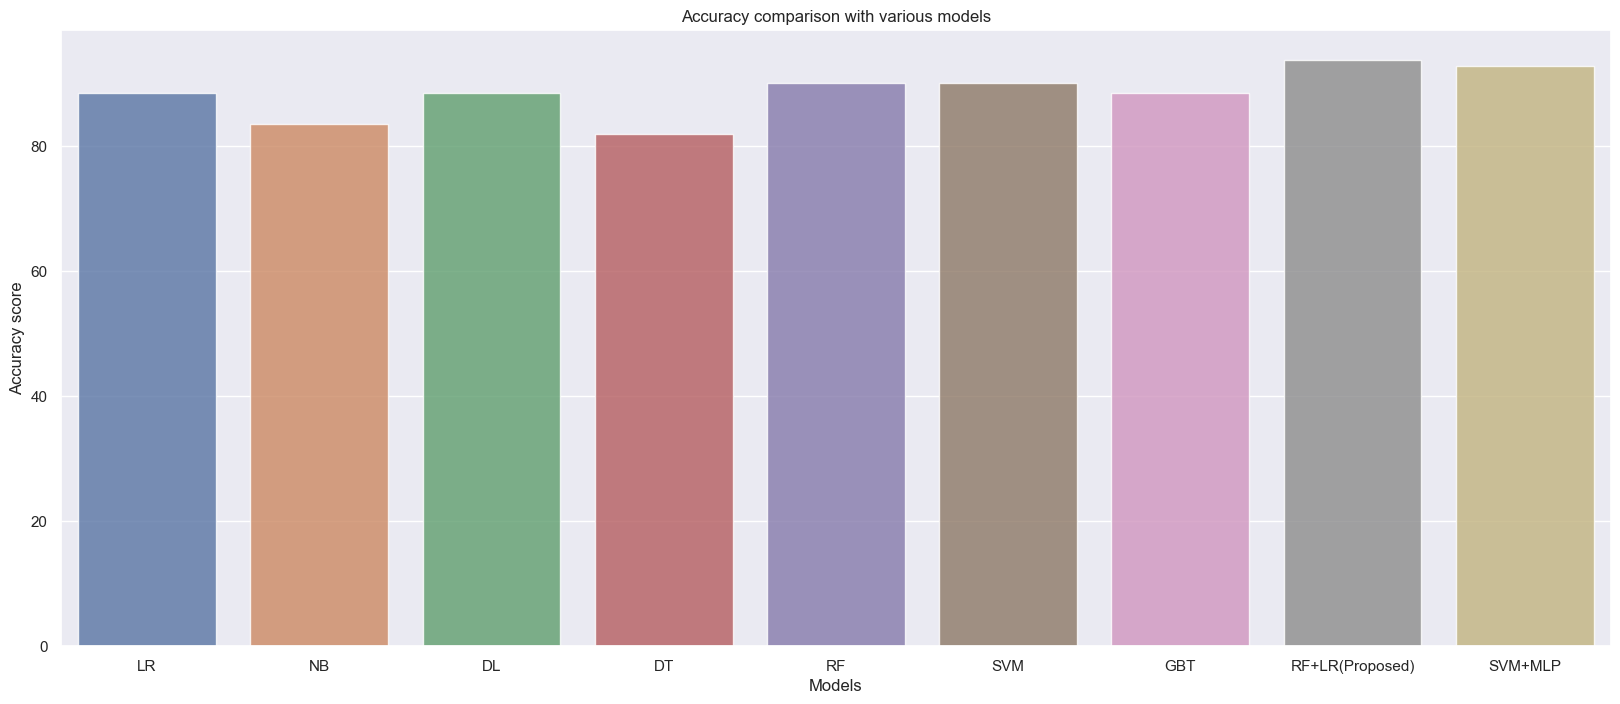

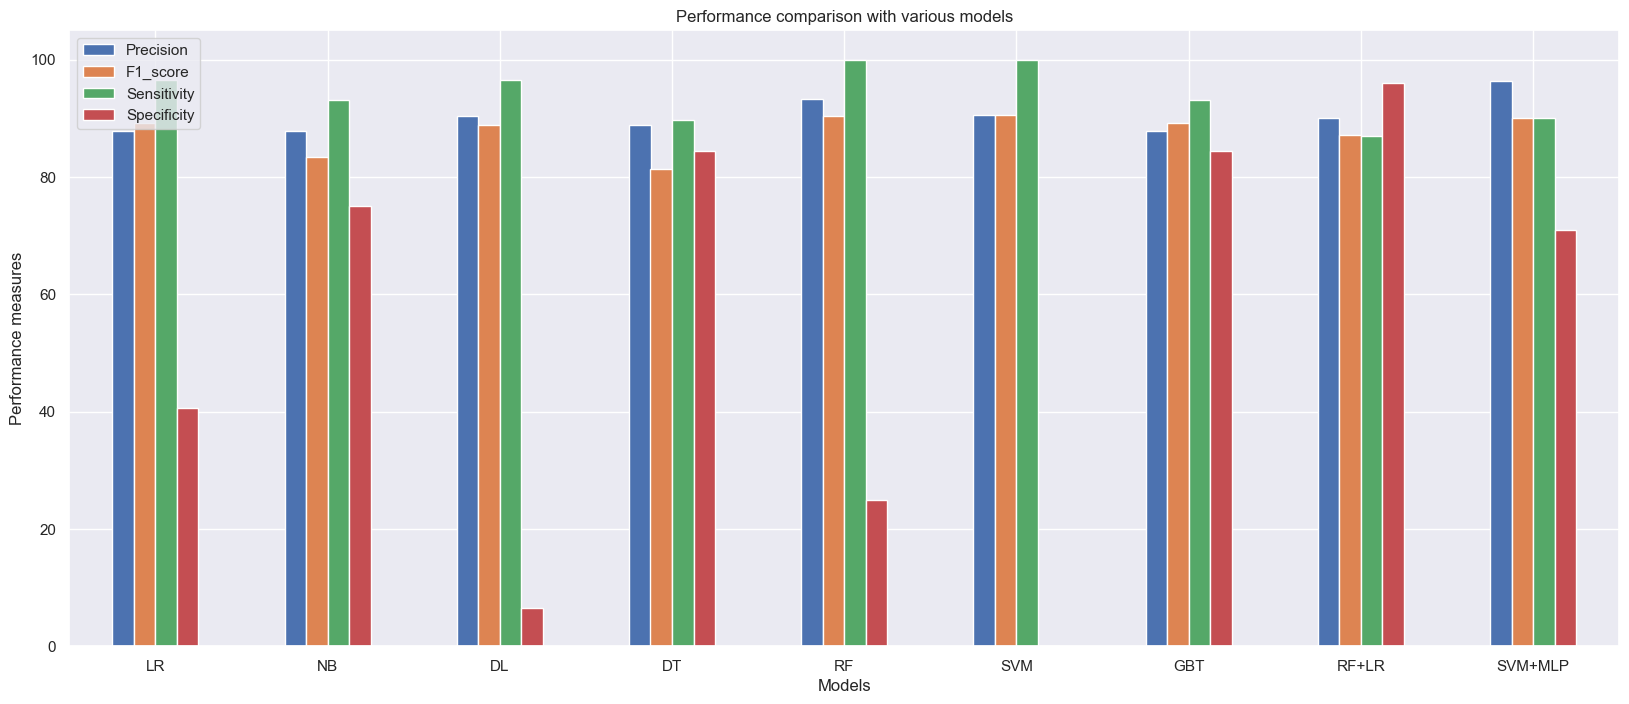

In [39]:
scores = [lr_acc, nb_acc, dl_acc, dt_acc, rf_acc, svm_acc, gbt_acc,HRFLM_Accuracy,Hybrid_Accuracy1]
algorithms = ["Logistic Regression","Naive Bayes","Deep Learning","DecisionTree","Random Forest","Support Vector Machine","Gradient Boosted","HRFLM Model","Ensemble Model(SVM+MLP)"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")
sns.set(rc={'figure.figsize':(20,8)})
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("Accuracy comparison with various models")
alg = ['LR', 'NB', 'DL', 'DT', 'RF', 'SVM', 'GBT','RF+LR(Proposed)','SVM+MLP']
sns.barplot(x=alg,y=scores,alpha=0.8)
precision =[lr_pre,nb_pre,dl_pre,dt_pre,rf_pre,svm_pre,gbt_pre,(HRFLM_Precision*100),(Hybrid_Precision1*100)]
F1_score =[lr_f1,nb_f1,dl_f1,dt_f1,rf_f1,svm_f1,gbt_f1,(HRFLM_F1Score*100),(Hybrid_F1Score1*100)]
Sensitivity=[lr_sens,nb_sens,dl_sens,dt_sens,rf_sens,svm_sens,gbt_sens,87,90]
Specificity=[lr_spec,nb_spec,dl_spec,dt_spec,rf_spec,svm_spec,gbt_spec,96,71]
index = ['LR', 'NB', 'DL','DT', 'RF', 'SVM', 'GBT','RF+LR','SVM+MLP']
df = pd.DataFrame({'Precision': precision,'F1_score': F1_score, 'Sensitivity':Sensitivity, 'Specificity': Specificity}, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylabel('Performance measures')
ax.set_title('Performance comparison with various models')
ax.set_xlabel('Models')
dt = pd.DataFrame({'Models':["Logistic Regression","Naive Bayes","DeepLearning","Decision Tree","Random Forest","Support Vector Machine","GradientBoosted","HRFLM","SVM+MLP"],
'Accuracy':[lr_acc, nb_acc, dl_acc, dt_acc, rf_acc, svm_acc, gbt_acc,HRFLM_Accuracy,Hybrid_Accuracy1],
'Classification Error':[100-lr_acc, 100-nb_acc, 100-dl_acc, 100-dt_acc,100-rf_acc, 100-svm_acc, 100-gbt_acc,100-HRFLM_Accuracy,100-Hybrid_Accuracy1],
'precision':[lr_pre,nb_pre,dl_pre,dt_pre,rf_pre,svm_pre,gbt_pre,(HRFLM_Precision*100),(Hybrid_Precision1*100)],
'F1_score':[lr_f1,nb_f1,dl_f1,dt_f1,rf_f1,svm_f1,gbt_f1,(HRFLM_F1Score*100),(Hybrid_F1Score1*100)],
'Sensitivity':[lr_sens,nb_sens,dl_sens,dt_sens,rf_sens,svm_sens,gbt_sens,93,88],
'Specificity':[lr_spec,nb_spec,dl_spec,dt_spec,rf_spec,svm_spec,gbt_spec,73,79]})
cm = sns.light_palette("white", as_cmap=True)

In [37]:
#MLPClassifier?